In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import pearsonr
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img,load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import tensorflow as tf
import PIL
import requests
from matplotlib import cm
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import os
import cv2
from PIL import Image
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import pdb
import random

In [16]:
pip install tensorflow
pip install opencv-python
pip install xgboost
pip install openxxyl

SyntaxError: invalid syntax (3400541714.py, line 1)

In [86]:
filename = "android-work\\testing.xlsx"
train_path = "android-work\\train"
validation_path = "android-work\\val"
test_path = "android-work\\test"

In [87]:
df = pd.read_excel(filename)
df_cic= df[df['Family'].isin(['airpush', 'dowgin'])]
family_counts=df_cic['Family'].value_counts()
family_counts

Family
airpush    2017
dowgin      910
Name: count, dtype: int64

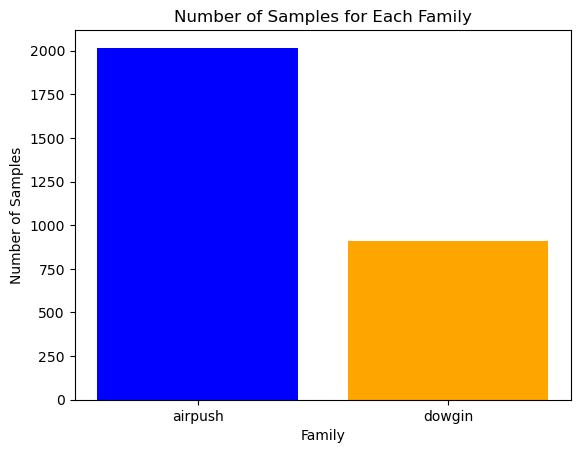

In [88]:
plt.bar(family_counts.index, family_counts.values, color=['blue', 'orange'])
plt.xlabel('Family')
plt.ylabel('Number of Samples')
plt.title('Number of Samples for Each Family')
plt.show()

In [89]:
df.drop(columns=['Hash', 'Category'], axis=1, inplace=True)

encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Family'])

df.drop(columns = 'Family' ,axis=1, inplace=True)
y = df['Label'] 
X = df.drop(columns = 'Label', axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
zero_variance_columns= df.columns[df.var() == 0]
print(zero_variance_columns)


df = df.drop(columns= zero_variance_columns)

correlation_matrix=np.corrcoef(df, rowvar=False, ddof=1)

Index(['Memory_SwapPssDirty', 'Memory_AssetManagers',
       'API_Process_android.os.Process_start',
       'API_Process_android.app.ActivityManager_killBackgroundProcesses',
       'API_JavaNativeInterface_java.lang.Runtime_loadLibrary',
       'API_JavaNativeInterface_java.lang.Runtime_load',
       'API_WebView_android.webkit.WebView_postUrl',
       'API_WebView_android.webkit.WebView_postWebMessage',
       'API_WebView_android.webkit.WebView_savePassword',
       'API_WebView_android.webkit.WebView_setHttpAuthUsernamePassword',
       'API_WebView_android.webkit.WebView_getHttpAuthUsernamePassword',
       'API_Database_android.database.sqlite.SQLiteDatabase_create',
       'API_IPC_android.content.ContextWrapper_sendStickyBroadcast',
       'API_DeviceInfo_android.net.wifi.WifiInfo_getNetworkId',
       'API_DeviceInfo_android.content.pm.PackageManager_getInstallerPackageName',
       'API_DeviceInfo_android.content.pm.PackageManager_getInstalledApplications',
       'API_Device

bias and ddof have no effect and are deprecated


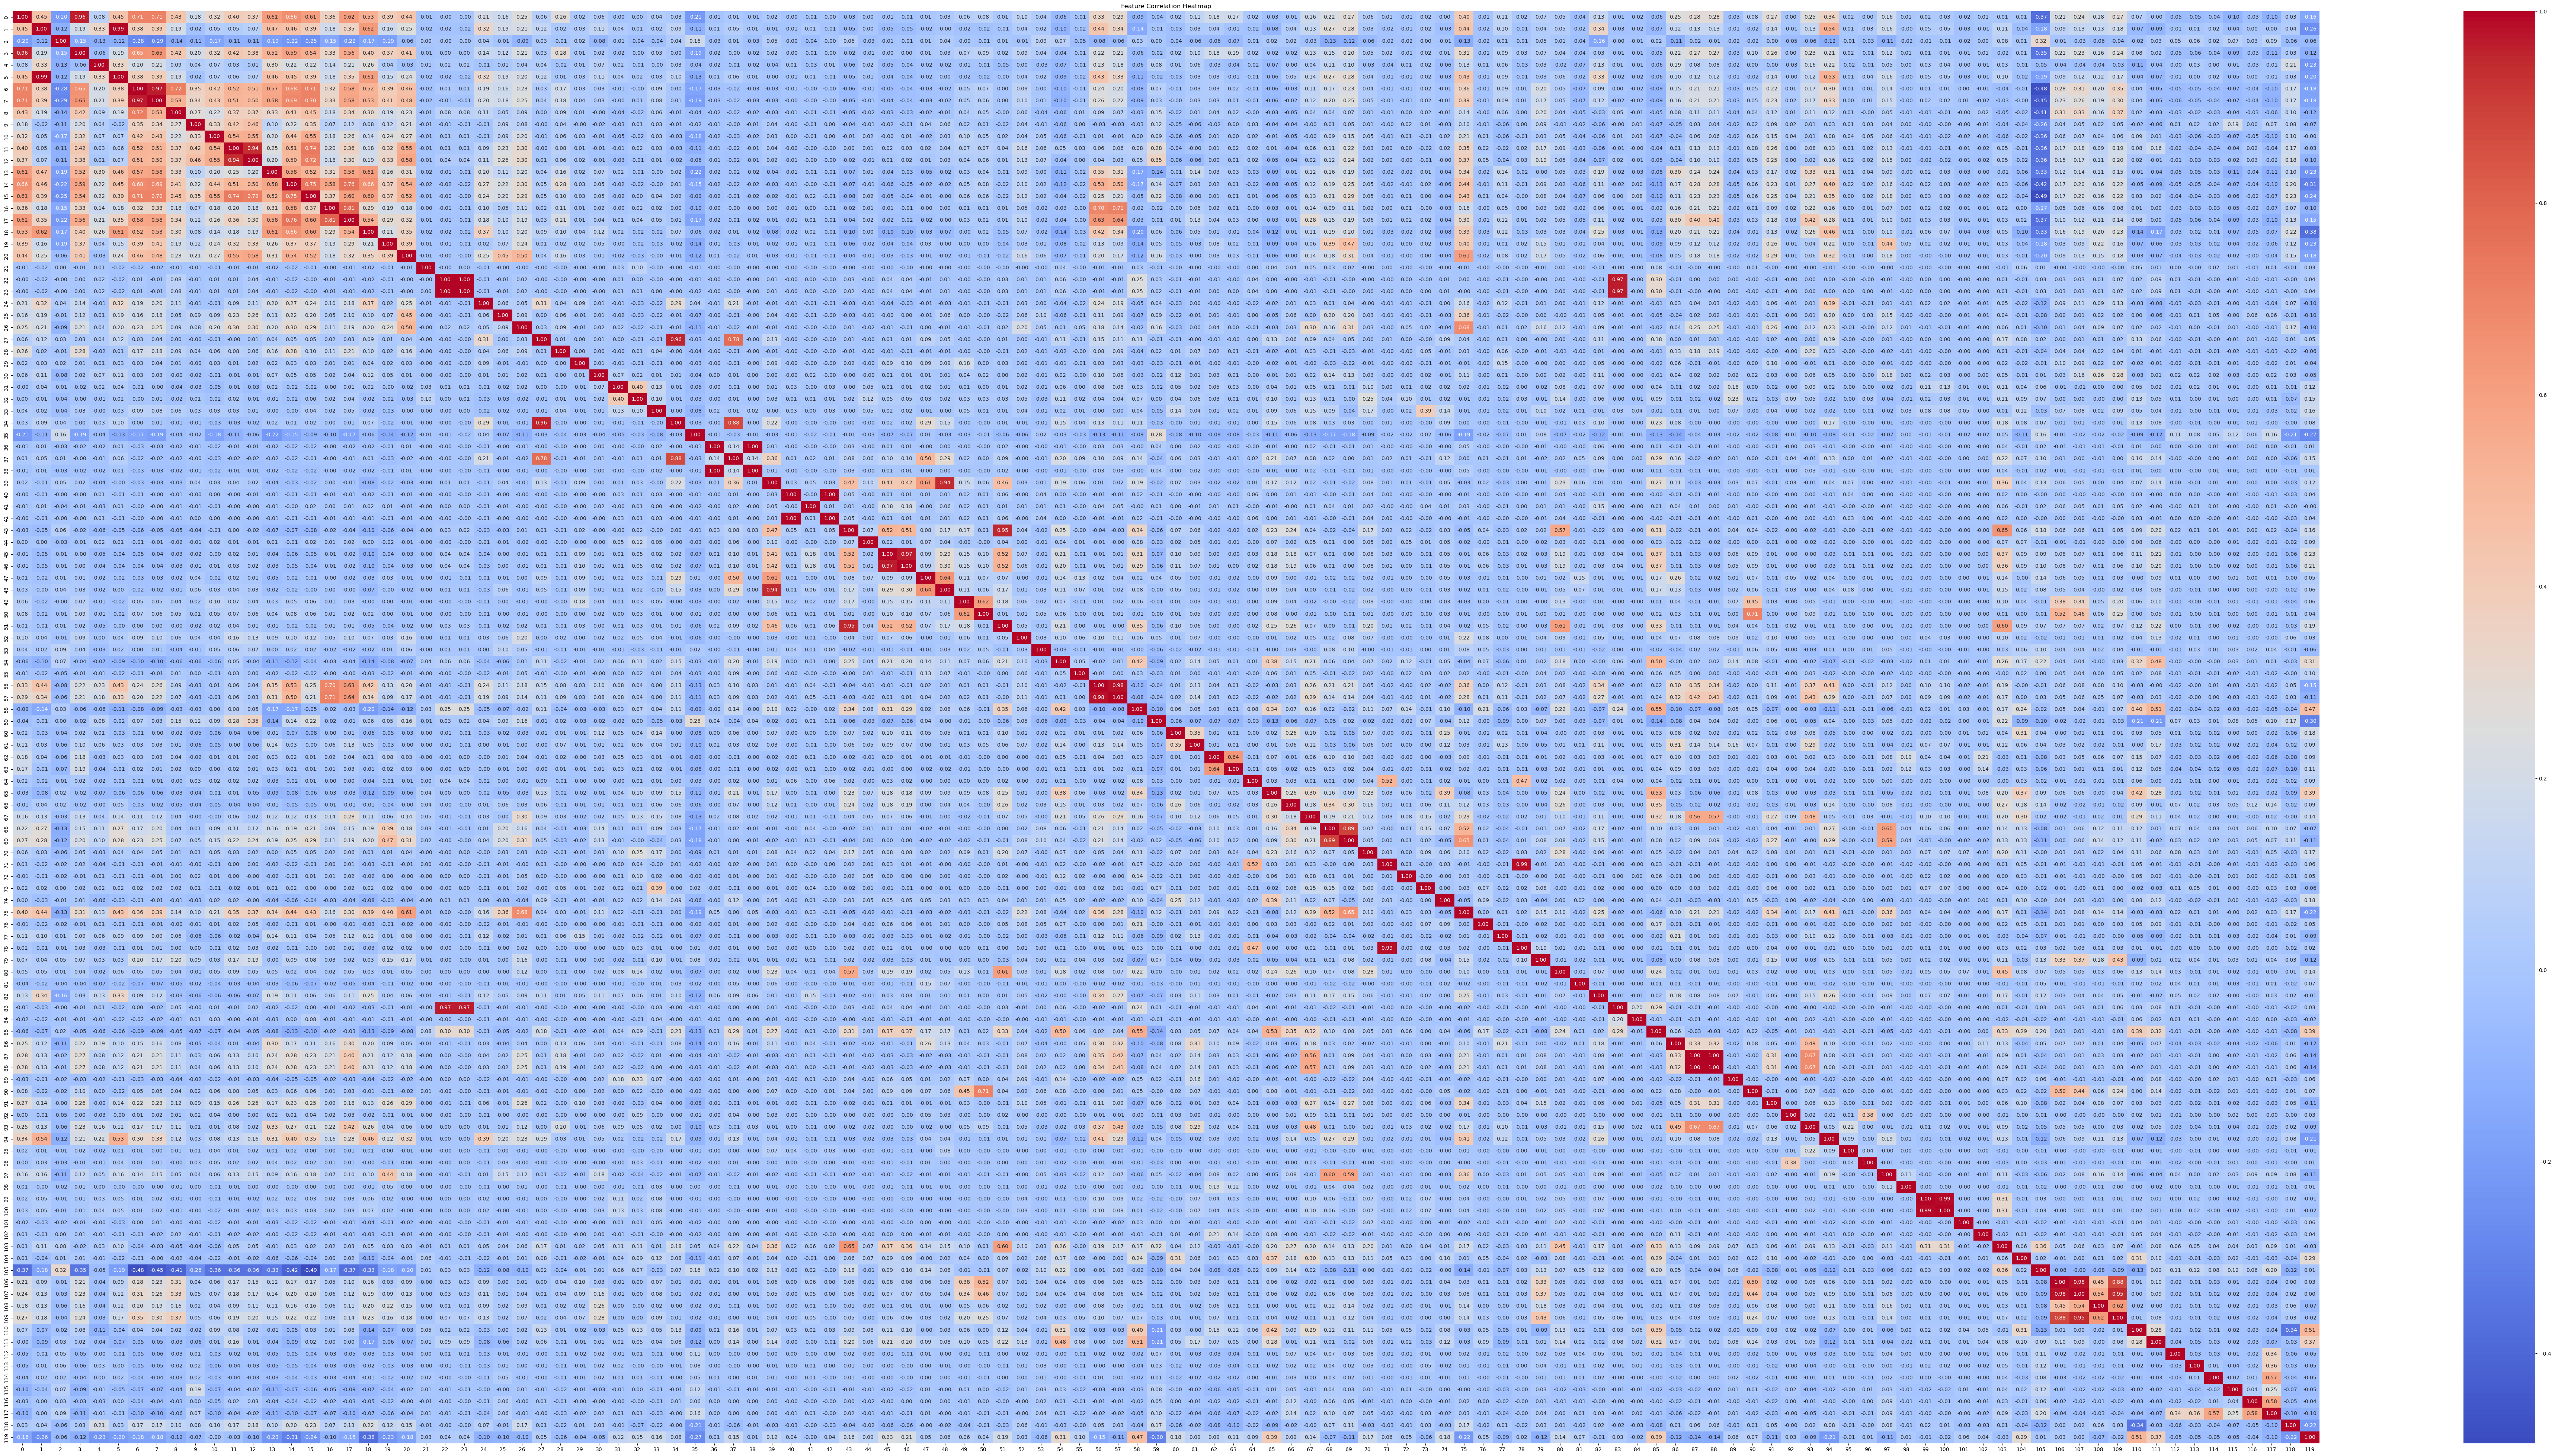

In [91]:
plt.figure(figsize=(100,50))
sns.heatmap(correlation_matrix,annot =True, fmt= ".2f", cmap= "coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [93]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=30),
    'Logistic Regression': LogisticRegression(random_state=0),
    'Adaboost': AdaBoostClassifier()
}

param_grids = {
    'Random Forest': {'classifier__n_estimators': [50, 60, 57]},
    'Decision Tree': {'classifier__max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Adaboost': {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1]}
}

selected_features_by_classifier = {}

for clf_name, clf in classifiers.items():
    pipeline = Pipeline([
        ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=56)),
        ('classifier', clf)
    ])

    param_grid = param_grids[clf_name]
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

    grid_search.fit(X_train, y_train)

    best_rfe_estimator = grid_search.best_estimator_

    X_train_rfe = best_rfe_estimator.named_steps['feature_selection'].transform(X_train)
    X_test_rfe = best_rfe_estimator.named_steps['feature_selection'].transform(X_test)

    selected_features_by_classifier[clf_name] = np.where(best_rfe_estimator.named_steps['feature_selection'].support_)[0]

common_features = set(selected_features_by_classifier[next(iter(classifiers))])
for _, features in selected_features_by_classifier.items():
    common_features.intersection_update(features)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [94]:
common_features = list(common_features)
print(f"Common set of {len(common_features)} features selected by most classifiers: {common_features}")

Common set of 42 features selected by most classifiers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 129, 132, 14, 15, 16, 17, 18, 20, 41, 43, 44, 64, 71, 76, 77, 78, 81, 82, 83, 85, 86, 87, 89, 90, 91, 92, 96, 98, 105, 125]


In [95]:
X_train_rfe_selected = X_train[:, common_features] #selected the common features
X_test_rfe_selected = X_test[:, common_features]

In [96]:
pca_pipeline = Pipeline([
    ('pca', PCA()),
])

param_grid = {
    'pca__n_components': range(1,37),
}

grid_search = GridSearchCV(pca_pipeline, param_grid=param_grid, cv=5)

grid_search.fit(X_train_rfe_selected)

best_pca_estimator = grid_search.best_estimator_

X_train_pca = best_pca_estimator.transform(X_train_rfe_selected)
X_test_pca = best_pca_estimator.transform(X_test_rfe_selected)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'pca__n_components': 36}


In [97]:
pca_columns = [f'PC{i}' for i in range(1, grid_search.best_params_['pca__n_components']+ 1)]
df_x_train_pca_cic = pd.DataFrame(data=X_train_pca, columns=pca_columns)
df_x_train_pca_cic.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.772026 -0.438473  0.973255  0.178390 -0.075367 -0.107072 -0.186101   
1 -3.641125 -0.937709  0.542655  0.335847 -0.425332  0.379130 -0.647177   
2  1.686782 -0.358334 -0.618469 -0.157841  0.349654  1.117473 -1.292630   
3  0.593832 -1.269600  0.417741 -0.147109  0.300505 -0.426756  0.367342   
4 -1.073706 -0.958419 -1.034607  0.015854 -0.763903 -0.200165  0.131666   

        PC8       PC9      PC10  ...      PC27      PC28      PC29      PC30  \
0  0.583133  0.070683  0.139385  ...  0.252448  0.166585  0.323644  0.094443   
1  0.190470 -0.715434 -0.147313  ...  0.007279 -0.317232 -0.074025  0.241198   
2  0.618509 -0.151754 -0.096031  ...  0.672272 -0.100162 -0.768676  0.373975   
3 -0.416555  0.109616 -0.052007  ...  0.332868 -0.460256  0.247066  0.020230   
4 -0.861430  0.373878 -0.208487  ... -0.152755  0.249023 -0.172647 -0.051781   

       PC31      PC32      PC33      PC34      PC35      PC36  
0 -0.053455  0.027651  0.144921 -0.323835  0.098920 -0.020278  
1  0.114461 -0.071724  0.017445  0.080979 -0.014777 -0.002562  
2  0.038330 -0.117769  0.060031  0.360040  0.068729 -0.033580  
3  0.134525 -0.266346 -0.213191  0.450680  0.011898 -0.033326  
4 -0.029314  0.008195 -0.156453 -0.323911  0.009191 -0.041991  

[5 rows x 36 columns]

In [98]:
explained_variance_ratio = best_pca_estimator.named_steps['pca'].explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [2.01240311e-01 7.65102728e-02 6.57194450e-02 4.85560714e-02
 4.52918748e-02 4.27224657e-02 3.89170793e-02 3.68616047e-02
 3.28004626e-02 3.23392839e-02 3.03200240e-02 2.86663767e-02
 2.57040160e-02 2.44991020e-02 2.37959658e-02 2.19006200e-02
 2.08113628e-02 1.93852555e-02 1.85413447e-02 1.76300718e-02
 1.70097602e-02 1.57387924e-02 1.52157597e-02 1.42643693e-02
 1.30383410e-02 1.18300348e-02 1.02285524e-02 1.00364474e-02
 8.48756845e-03 8.18190879e-03 6.78597668e-03 5.29596815e-03
 5.17484936e-03 4.71130515e-03 1.62895527e-03 1.13243322e-04]


In [100]:
cumulative_explained_variance_ratio = np.cumsum(best_pca_estimator.named_steps['pca'].explained_variance_ratio_)

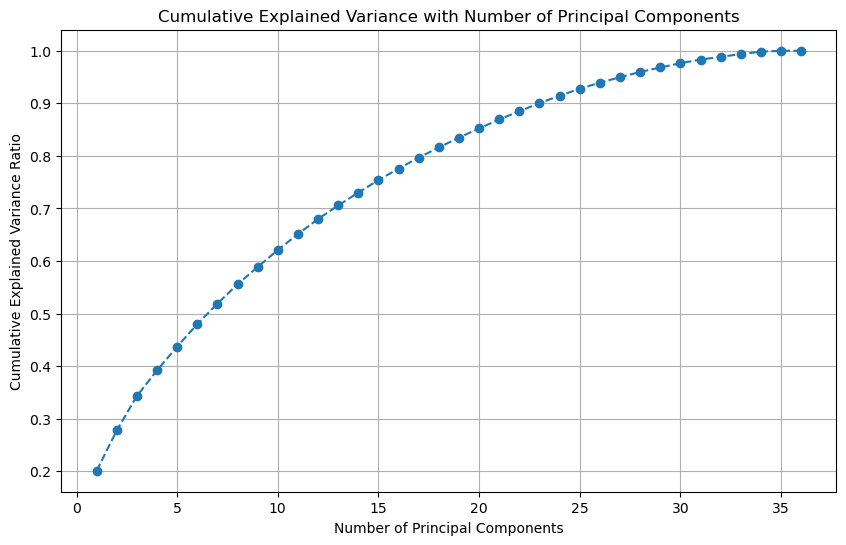

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance with Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [102]:
correlations, p_values = [], []
for feature_idx in range(X_train_pca.shape[1]):
    correlation, p_value = pearsonr(X_train_pca[:, feature_idx], y_train)
    correlations.append(correlation)
    p_values.append(p_value)

for feature_idx, (correlation, p_value) in enumerate(zip(correlations, p_values)):
    print(f"Feature {feature_idx + 1}: Correlation = {correlation:.4f}, p-value = {p_value:.4f}")

Feature 1: Correlation = -0.2923, p-value = 0.0000
Feature 2: Correlation = 0.4596, p-value = 0.0000
Feature 3: Correlation = -0.3290, p-value = 0.0000
Feature 4: Correlation = -0.0683, p-value = 0.0009
Feature 5: Correlation = 0.0723, p-value = 0.0005
Feature 6: Correlation = -0.0338, p-value = 0.1017
Feature 7: Correlation = 0.0531, p-value = 0.0101
Feature 8: Correlation = 0.0896, p-value = 0.0000
Feature 9: Correlation = 0.1161, p-value = 0.0000
Feature 10: Correlation = -0.0102, p-value = 0.6213
Feature 11: Correlation = -0.1312, p-value = 0.0000
Feature 12: Correlation = 0.0421, p-value = 0.0419
Feature 13: Correlation = -0.0783, p-value = 0.0002
Feature 14: Correlation = -0.0765, p-value = 0.0002
Feature 15: Correlation = -0.1546, p-value = 0.0000
Feature 16: Correlation = -0.0393, p-value = 0.0575
Feature 17: Correlation = -0.0221, p-value = 0.2848
Feature 18: Correlation = 0.1266, p-value = 0.0000
Feature 19: Correlation = -0.0032, p-value = 0.8781
Feature 20: Correlation = -0

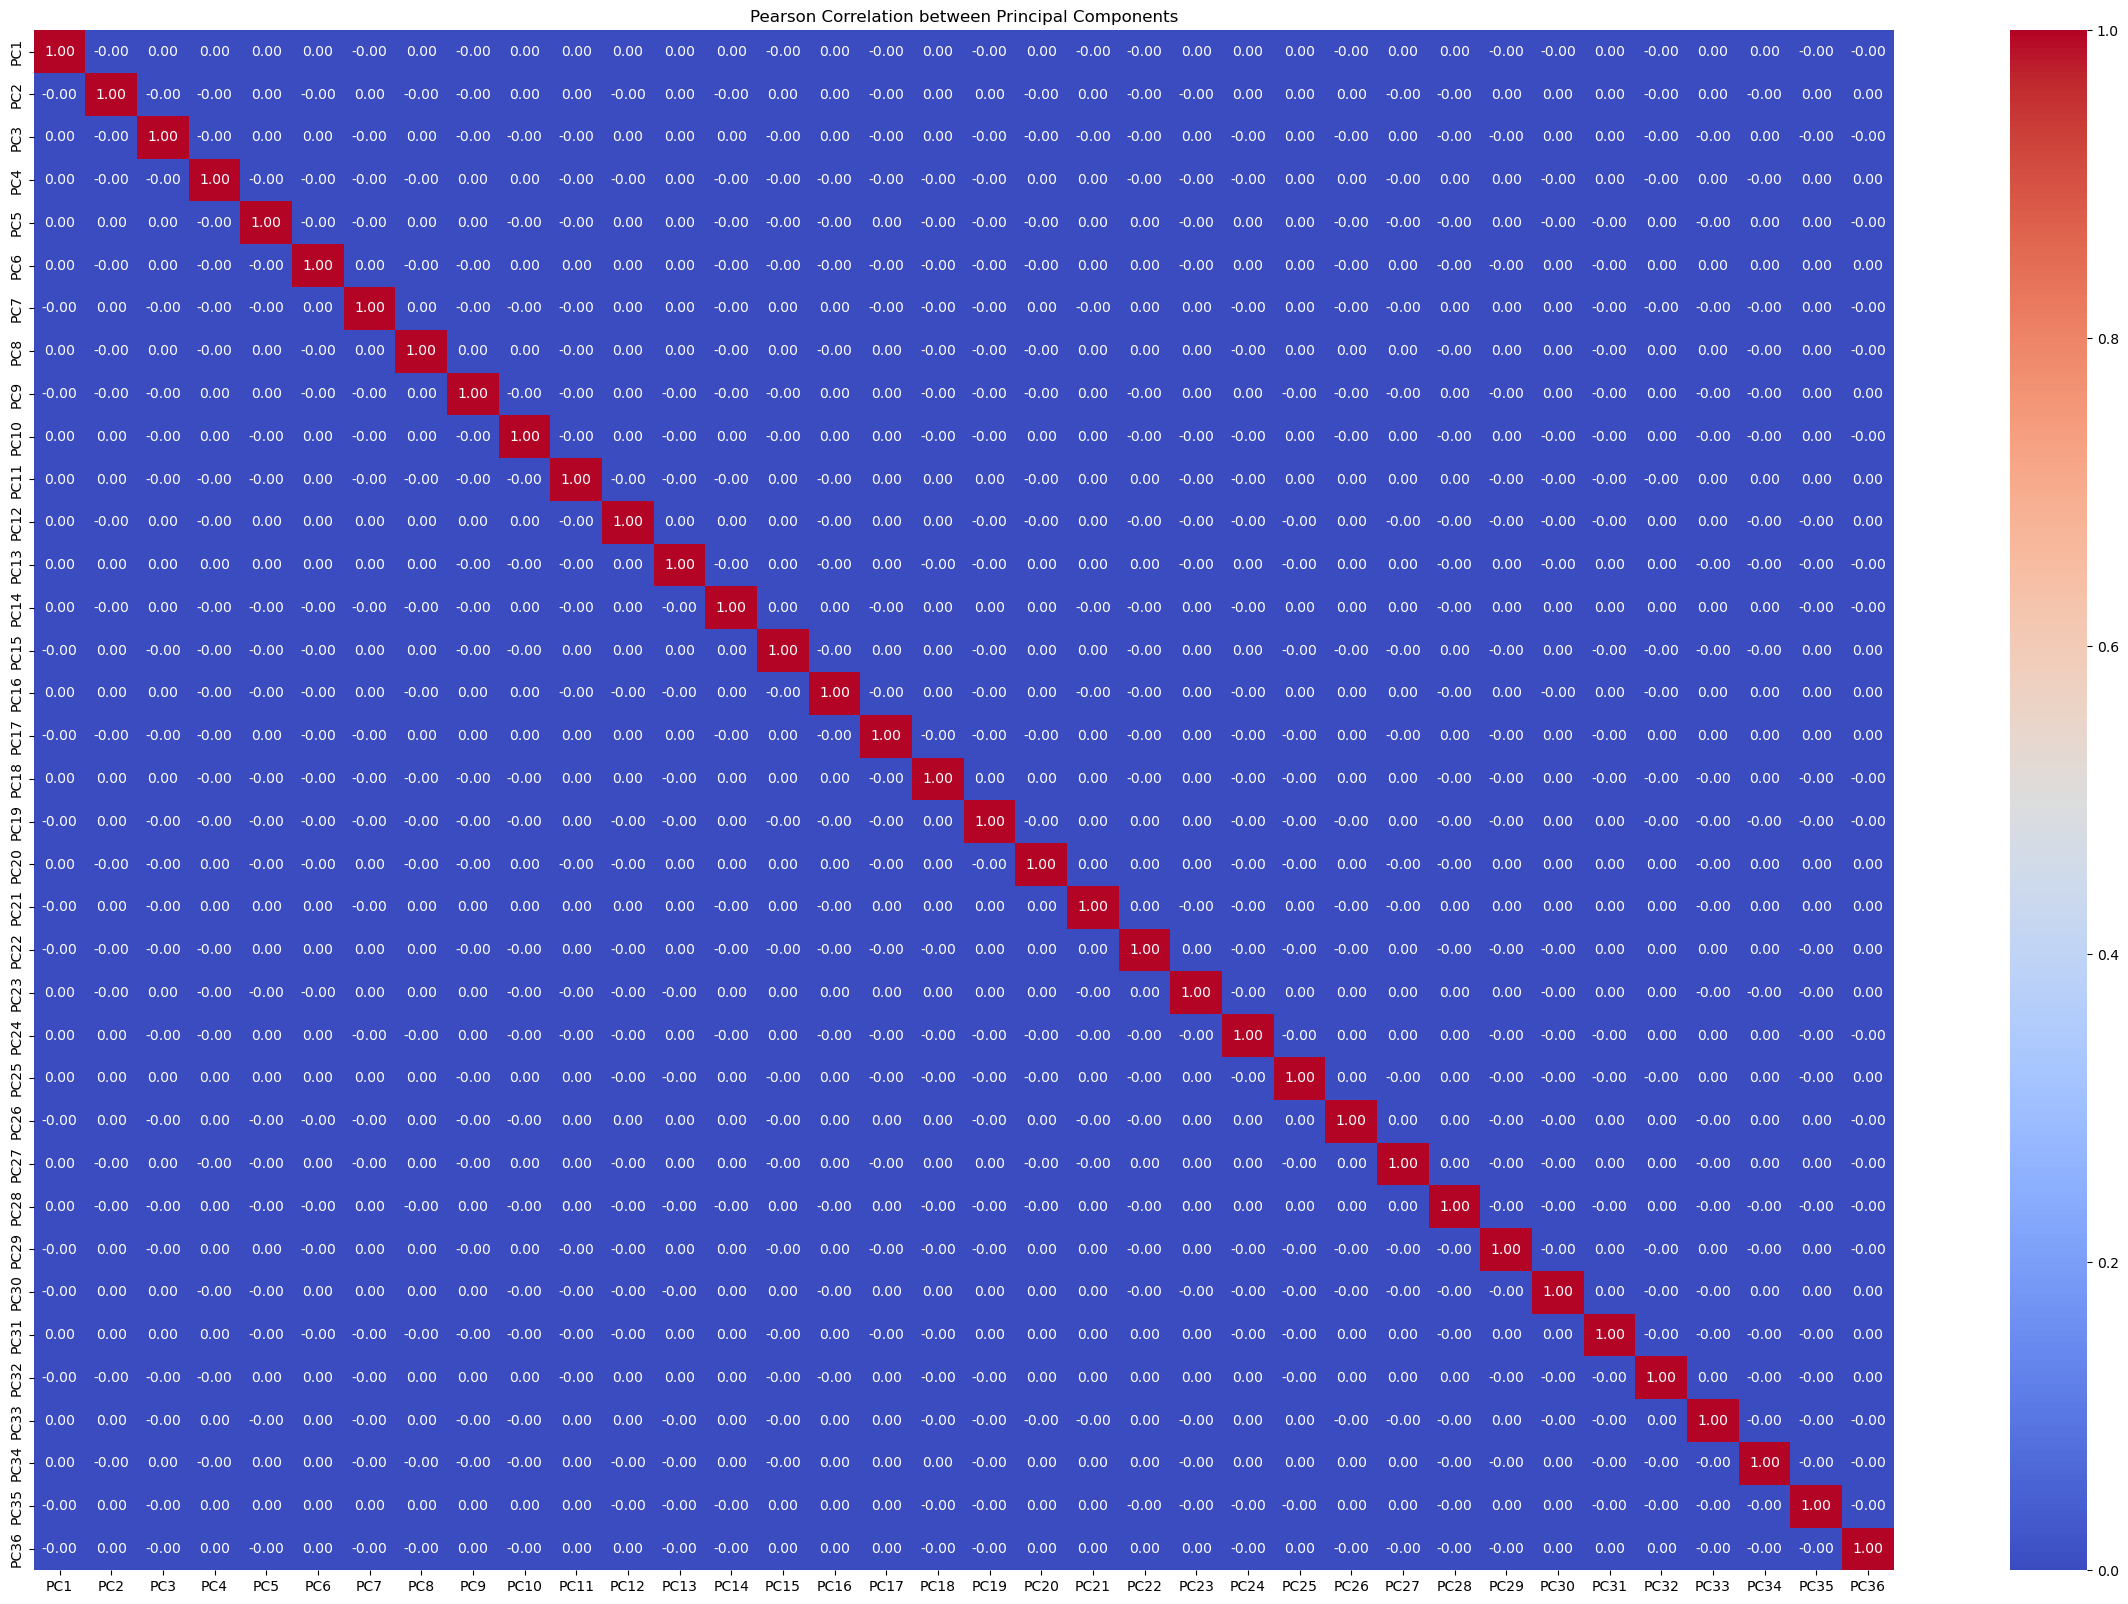

In [103]:
correlation_matrix = np.corrcoef(X_train_pca, rowvar=False)

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=pca_columns, yticklabels=pca_columns)
plt.title("Pearson Correlation between Principal Components")
plt.show()

In [104]:
param_grid = {
    'max_depth': range(1, 50),
    'min_samples_leaf': range(1, 50)
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for DT with Highest Accuracy Score:", best_params)
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train_pca, y_train)
y_pred = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Best Hyperparameters for DT with Highest Accuracy Score: {'max_depth': 20, 'min_samples_leaf': 4}
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       408
           1       0.83      0.83      0.83       178

    accuracy                           0.89       586
   macro avg       0.87      0.87      0.87       586
weighted avg       0.89      0.89      0.89       586



In [105]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for RF with Highest Accuracy Score:", best_params)
best_model = RandomForestClassifier(**best_params, criterion= 'entropy')
best_model.fit(X_train_pca, y_train)
y_pred = best_model.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred))


360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jummy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jummy\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\jummy\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jummy\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParam

Best Hyperparameters for RF with Highest Accuracy Score: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.95
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       408
           1       0.96      0.87      0.91       178

    accuracy                           0.95       586
   macro avg       0.95      0.93      0.94       586
weighted avg       0.95      0.95      0.95       586



In [106]:
param_grid = {
    'C': [10**i for i in range(-10,10)],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for LR with Highest Accuracy Score:", best_params)
# Make predictions on the test set using the best model
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_pca, y_train)
y_pred_cic_lr = best_model.predict(X_test_pca)
accuracy_lr = accuracy_score(y_test, y_pred_cic_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print('Logistic Regression Classification Report:\n', classification_report(y_test, y_pred_cic_lr))

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
Setting penalty=None will ignore the C and l1_ratio parameters
`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
Setting penalty=None will ignore the C and l1_ratio parameters
`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
Setting penalty=None will ignore the C and l1_ratio parameters
`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
Setting penalty=None will ignore the C and l1_ratio parameters
`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
Setting penalty=None will ignore the C and l1_ratio parameters
`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past be

Best Hyperparameters for LR with Highest Accuracy Score: {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.93
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       408
           1       0.89      0.88      0.89       178

    accuracy                           0.93       586
   macro avg       0.92      0.92      0.92       586
weighted avg       0.93      0.93      0.93       586



In [107]:
param_grid = {
    'C': range(1, 50),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))

}
grid_search = GridSearchCV(svm.SVC(kernel = 'linear'), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for SVM with Highest Accuracy Score:", best_params)
best_model =  svm.SVC(kernel='linear', **best_params)
best_model.fit(X_train_pca, y_train)
y_pred_cic_svm = best_model.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_cic_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm:.2f}')
print('Support Vector Machine Classification Report:\n', classification_report(y_test, y_pred_cic_svm))

Best Hyperparameters for SVM with Highest Accuracy Score: {'C': 47, 'gamma': 'scale'}
Support Vector Machine Accuracy: 0.94
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       408
           1       0.89      0.89      0.89       178

    accuracy                           0.94       586
   macro avg       0.92      0.92      0.92       586
weighted avg       0.94      0.94      0.94       586



In [108]:
param_grid = {
    'C': [1,2,3],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}
grid_search = GridSearchCV(svm.SVC(kernel = 'rbf'), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for SVM with Highest Accuracy Score:", best_params)
best_model =  svm.SVC(kernel='rbf', **best_params)
best_model.fit(X_train_pca, y_train)
y_pred_cic_svm = best_model.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_cic_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm:.2f}')
print('Support Vector Machine Classification Report:\n', classification_report(y_test, y_pred_cic_svm))

Best Hyperparameters for SVM with Highest Accuracy Score: {'C': 3, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale'}
Support Vector Machine Accuracy: 0.95
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       408
           1       0.93      0.90      0.91       178

    accuracy                           0.95       586
   macro avg       0.94      0.94      0.94       586
weighted avg       0.95      0.95      0.95       586



In [109]:
param_grid_knn = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for KNN with Highest Accuracy Score:", best_params)
best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train_pca, y_train)
y_pred = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Best Hyperparameters for KNN with Highest Accuracy Score: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       408
           1       0.96      0.84      0.89       178

    accuracy                           0.94       586
   macro avg       0.94      0.91      0.92       586
weighted avg       0.94      0.94      0.94       586



In [110]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for GaussianNB with Highest Accuracy Score:", best_params)
best_model = GaussianNB(**best_params)
best_model.fit(X_train_pca, y_train)
y_pred = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Best Hyperparameters for GaussianNB with Highest Accuracy Score: {'var_smoothing': 1.873817422860383e-06}
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       408
           1       0.75      0.49      0.59       178

    accuracy                           0.80       586
   macro avg       0.78      0.71      0.73       586
weighted avg       0.79      0.80      0.78       586



In [111]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for XGB with Highest Accuracy Score:", best_params)
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_pca, y_train)
y_pred = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Best Hyperparameters for XGB with Highest Accuracy Score: {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6}
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       408
           1       0.93      0.85      0.89       178

    accuracy                           0.94       586
   macro avg       0.94      0.91      0.92       586
weighted avg       0.94      0.94      0.94       586



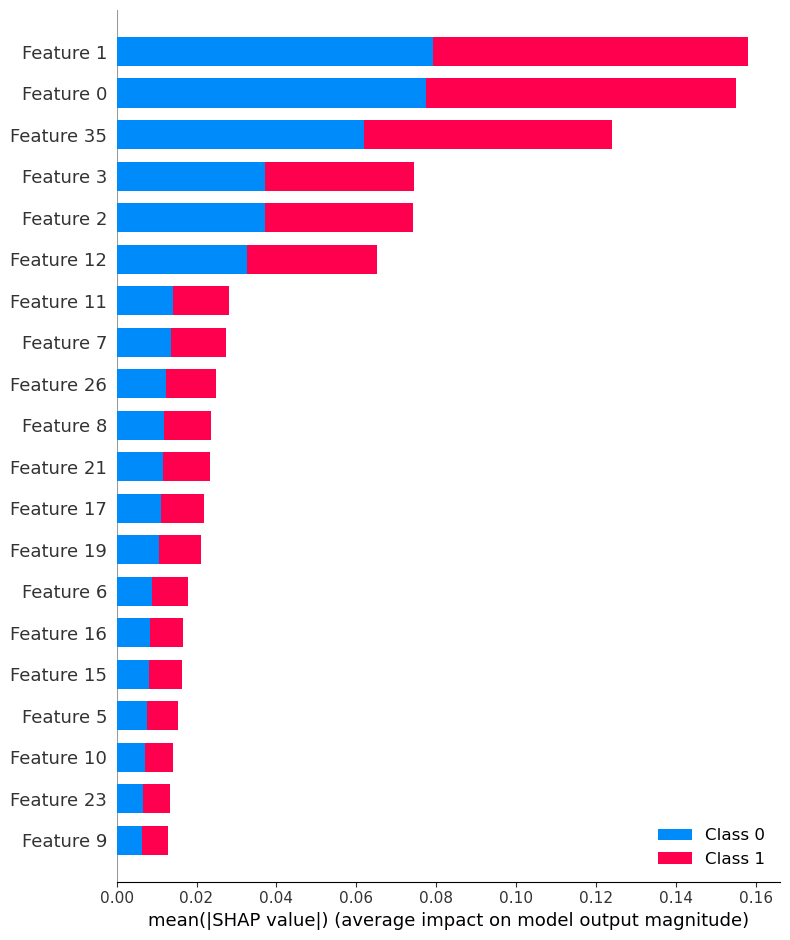

In [112]:
model = RandomForestClassifier(max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
model.fit(X_train_pca, y_train)

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_pca)

# Summary plot
shap.summary_plot(shap_values, X_test_pca)
# shap.plots.bar(shap_values)

In [113]:
categories = ['Airpush', 'Dowgin']

Category: Airpush, Image Size: 258 x 258 pixels
Category: Dowgin, Image Size: 258 x 258 pixels


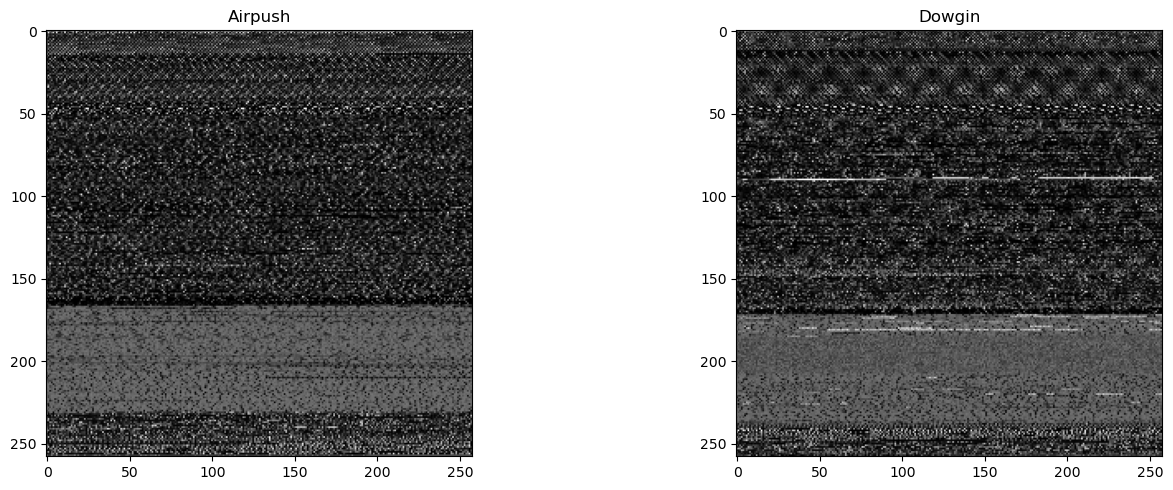

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, category in enumerate(categories):
    category_folder = os.path.join(train_path, category)

    image_files = [f for f in os.listdir(category_folder) if f.endswith('.png')]

    random_image_file = random.choice(image_files)

    random_image_path = os.path.join(category_folder, random_image_file)

    random_image = Image.open(random_image_path)

    image_size = random_image.size

    print(f"Category: {category}, Image Size: {image_size[0]} x {image_size[1]} pixels")

    axes[i].imshow(random_image)

    axes[i].set_title(category)

plt.tight_layout()
plt.show()

In [115]:
category_counts = {}

for category in categories:
    category_folder = os.path.join(train_path, category)
    image_files = [f for f in os.listdir(category_folder) if f.endswith('.png')]
    category_counts[category] = len(image_files)

for category, count in category_counts.items():
    print(f"{category}: {count} samples")

Airpush: 749 samples
Dowgin: 489 samples


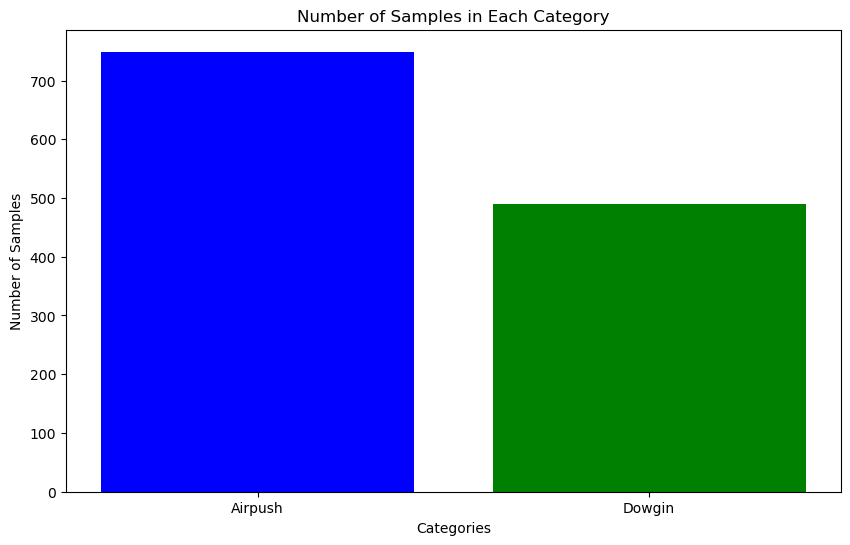

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(category_counts.keys(), category_counts.values(), color=['blue', 'green', 'red'])
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Samples')
ax.set_title('Number of Samples in Each Category')
plt.show()

In [117]:
target_size = (258, 258)

resized_dir = r"android-work\resized"

categories = os.listdir(train_path)

# Loop through both train and validation directories
for dataset_path in [train_path, validation_path]:
    for category in categories:
        category_folder = os.path.join(dataset_path, category)
        resized_category_folder = os.path.join(resized_dir, category)

        os.makedirs(resized_category_folder, exist_ok=True)

        image_files = [f for f in os.listdir(category_folder) if f.endswith('.png')]

        for image_file in tqdm(image_files, desc=f"Processing {dataset_path}/{category}"):
            input_image_path = os.path.join(category_folder, image_file)
            output_image_path = os.path.join(resized_category_folder, image_file)

            image = Image.open(input_image_path)

            # Resize the image
            resized_image = image.resize(target_size)

            # Save the resized image
            resized_image.save(output_image_path)

print("Resizing complete.")

Processing android-work\val/Dowgin: 100%|██████████| 122/122 [00:02<00:00, 49.00it/s]

Resizing complete.


In [118]:
normalized_dir = r"android-work\normalized" 

categories = os.listdir(resized_dir)

for category in categories:
    category_folder_resized = os.path.join(resized_dir, category)
    category_folder_normalized = os.path.join(normalized_dir, category)

    # Create the 'normalized' directory if it doesn't exist
    os.makedirs(category_folder_normalized, exist_ok=True)

    image_files = [f for f in os.listdir(category_folder_resized) if f.endswith('.png')]

    for image_file in image_files:
        input_image_path = os.path.join(category_folder_resized, image_file)
        output_image_path = os.path.join(category_folder_normalized, image_file)

        image = Image.open(input_image_path)

        image_array = np.array(image)

        normalized_image = (image_array / 127.5) - 1.0

        # Save the normalized image to the 'normalized' directory
        normalized_image = Image.fromarray((normalized_image * 127.5 + 127.5).astype(np.uint8))
        normalized_image.save(output_image_path)

print("Normalization complete.")

Normalization complete.


Category: Airpush, Image Size: 258 x 258 pixels
Category: Dowgin, Image Size: 258 x 258 pixels


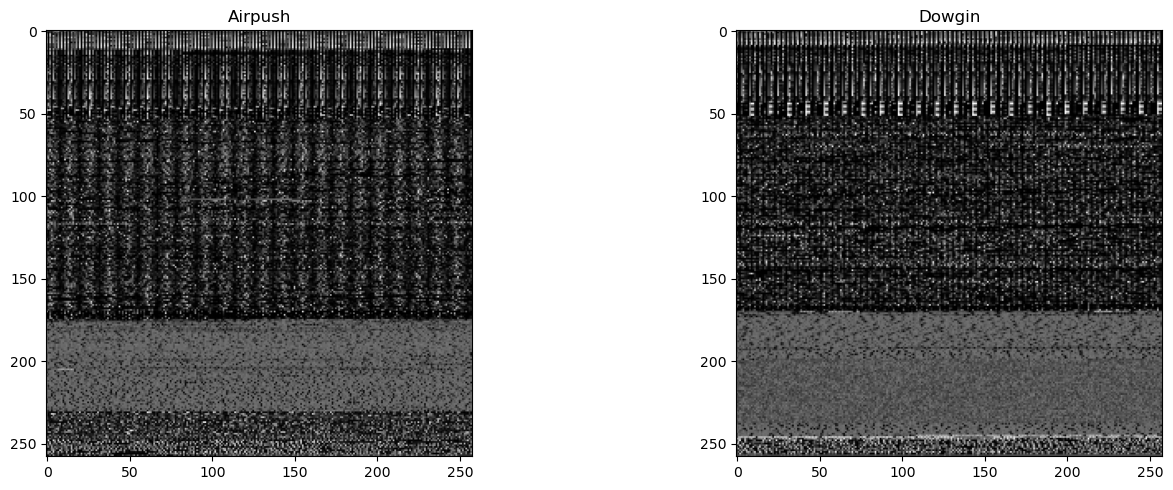

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, category in enumerate(categories):
    category_folder = os.path.join(normalized_dir, category)

    image_files = [f for f in os.listdir(category_folder) if f.endswith('.png')]

    random_image_file = random.choice(image_files)

    random_image_path = os.path.join(category_folder, random_image_file)

    random_image = Image.open(random_image_path)

    image_size = random_image.size

    print(f"Category: {category}, Image Size: {image_size[0]} x {image_size[1]} pixels")

    axes[i].imshow(random_image)

    axes[i].set_title(category)

plt.tight_layout()
plt.show()

In [120]:
img_train_dir = r"android-work\normalized"
img_test_dir = r"android-work\test"


def load_images_from_directory(directory, target_size=(258, 258)):
    images = []
    labels = []

    class_folders = os.listdir(directory)

    class_label_mapping = {class_folder: i for i, class_folder in enumerate(class_folders)}

    for i, class_folder in enumerate(class_folders):

        class_path = os.path.join(directory, class_folder)

        for image_file in os.listdir(class_path):
            if image_file.endswith('.png'):
                image_path = os.path.join(class_path, image_file)

                img = Image.open(image_path)
                img_array = np.array(img)

                # Resize the image while maintaining the original aspect ratio
                img_resized = resize(img_array, target_size, anti_aliasing=True)

                images.append(img_resized)
                labels.append(i)

    # Print class name to label mapping (excluding the specified class)
    print("Class Name to Label Mapping")
    for class_name, label in class_label_mapping.items():
            print(f"{class_name}: {label}")

    return np.array(images), np.array(labels)
train_images, train_labels = load_images_from_directory(img_train_dir)
test_images, test_labels = load_images_from_directory(img_test_dir)

Class Name to Label Mapping
Airpush: 0
Dowgin: 1
Class Name to Label Mapping
Airpush: 0
Dowgin: 1


In [121]:
input_shape = (258, 258, 3)
# the only change 

image_model = Sequential()

image_model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
image_model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
image_model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))

image_model.add(MaxPooling2D(pool_size=(5, 5)))
image_model.add(MaxPooling2D(pool_size=(5, 5)))

image_model.add(Flatten())

image_model.add(Dense(X_train_pca.shape[1], activation='relu'))

# Output layer
num_classes = 2
image_model.add(Dense(num_classes, activation='softmax'))

In [411]:
image_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 64)      4864      
                                                                 
 conv2d_12 (Conv2D)          (None, 250, 250, 64)      102464    
                                                                 
 conv2d_13 (Conv2D)          (None, 246, 246, 64)      102464    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 5184)             

In [302]:
# Compile the model
image_model.compile(loss='categorical_crossentropy',  optimizer='adam',metrics=['accuracy'])

In [303]:
# One-hot encode the labels
num_classes = len(np.unique(train_labels))
train_labels_one_hot = to_categorical(train_labels, num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes)

In [304]:
X_train_images, X_val_images, y_train_images, y_val_images = train_test_split(train_images, train_labels_one_hot, test_size=0.2, random_state=42)

In [305]:
epochs = 10 
batch_size = 32  

history_img = image_model.fit(X_train_images, y_train_images, epochs=epochs, batch_size=batch_size, validation_data=(X_val_images, y_val_images))
image_model.save('model.h5')

Epoch 1/10
39/39 [==============================] - 406s 10s/step - loss: 0.1205 - accuracy: 0.9717 - val_loss: 0.0588 - val_accuracy: 0.9806
Epoch 2/10
39/39 [==============================] - 365s 9s/step - loss: 0.0118 - accuracy: 0.9976 - val_loss: 0.0307 - val_accuracy: 0.9806
Epoch 3/10
39/39 [==============================] - 368s 9s/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0208 - val_accuracy: 0.9968
Epoch 4/10
39/39 [==============================] - 367s 9s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 0.9935
Epoch 5/10
39/39 [==============================] - 368s 9s/step - loss: 6.1999e-04 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 0.9935
Epoch 6/10
39/39 [==============================] - 372s 10s/step - loss: 4.3392e-04 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9935
Epoch 7/10
39/39 [==============================] - 368s 9s/step - loss: 3.3018e-04 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9935

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [402]:
test_loss, test_accuracy = image_model.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy: {test_accuracy}')

13/13 [==============================] - 20s 1s/step - loss: 0.1738 - accuracy: 0.9689
Test accuracy: 0.9689119458198547


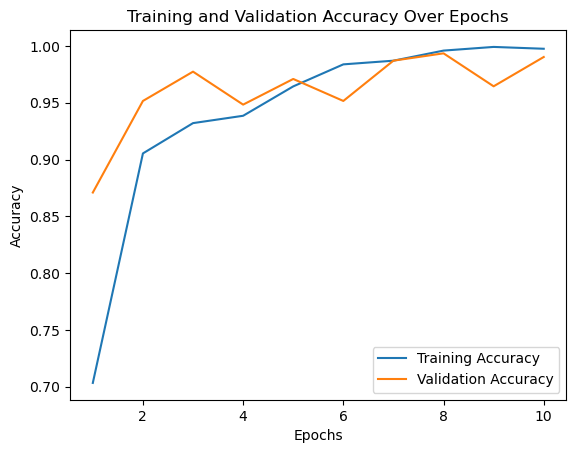

In [128]:
train_accuracy = history_img.history['accuracy']
val_accuracy = history_img.history['val_accuracy']

epochs_range = range(1, epochs + 1)

# Plotting the training and validation accuracy
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

In [448]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Get the gradient of the predicted class with regard to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute the gradient of the class channel with respect to the output feature
    grads = tape.gradient(class_channel, last_conv_layer_output)

     # Add a new axis to pooled_grads before matrix multiplication
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))  # Reduce along both spatial dimensions

    # Multiply each channel in the feature map array by "how important this channel is" with regard to the predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    pooled_grads = tf.broadcast_to(pooled_grads, last_conv_layer_output.shape)  # Reduce along both spatial dimensions
    heatmap = tf.reduce_sum(last_conv_layer_output * pooled_grads, axis=-1)

    # ReLU on the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)


    return heatmap.numpy()

def display_gradcam(img, heatmap, alpha=0.4):
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Resize the heatmap to original image size
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img * (1 - alpha)
    # Display the superimposed image
    plt.imshow(superimposed_img[0])

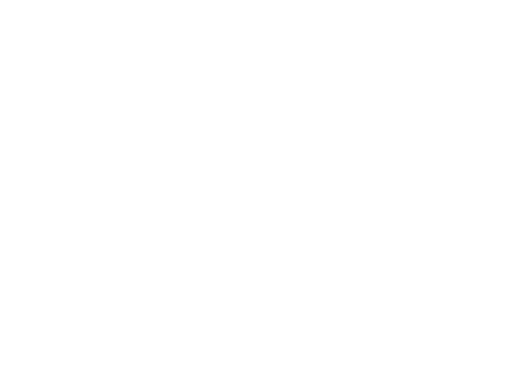

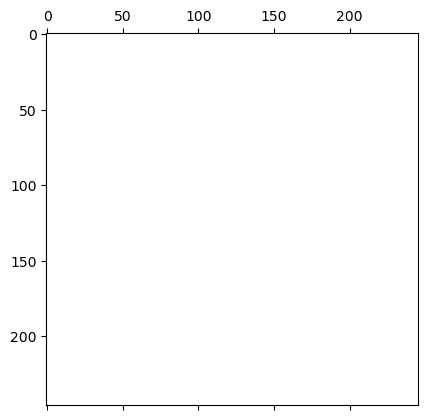

In [449]:
# Example usage
model = load_model('model.h5')  # Load your trained model
img_path = 'android-work\\normalized\\Airpush\\Airpush_variety1_008662eda2d093197d3725df0f3263f0.apk.png'
size = (258, 258)  # Input size expected by the model

img_array = get_img_array(img_path, size)

last_conv_layer_name = 'conv2d_13'  # Replace with the name of the last convolutional layer in your model
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

plt.axis('off')
plt.matshow(heatmap)
plt.show()

In [439]:
display_gradcam(img_path, heatmap)

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


AttributeError: 'str' object has no attribute 'shape'

In [239]:
X_train_images_resized= np.array([cv2.resize(image,(128,128)) for image in X_train_images])
# X_train_images_resized=X_train_images_resized.reshape(-1,128,128,3)

In [240]:
print(X_train_images_resized.shape)

(1237, 128, 128, 3)


In [241]:
print(y_train_images.shape)

(1237, 2)


In [246]:
y_train_images = np.array(y_train_images)[:,0]

# indices to sort y_train_images
sorted_indices = np.argsort(np.squeeze(y_train_images))

# sort X_train_images and y_train_images
X_train_images_resized = X_train_images_resized[sorted_indices]
y_train_images = y_train_images[sorted_indices]

In [247]:
print(X_train_images_resized.shape)

(1237, 128, 128, 3)


In [248]:
y_train = np.array(y_train)

# indices to sort y_train_images
sorted_indices = np.argsort(y_train)

# sort X_train_images and y_train_images
X_train_pca = X_train_pca[sorted_indices]
y_train = y_train[sorted_indices]

In [249]:
# Get the number of samples in X_train_images
num_samples = X_train_images_resized.shape[0]

# Randomly select a subset of X_train_pca and y_train
indices = np.random.choice(X_train_pca.shape[0], size=num_samples, replace=False)
X_train_pca_subset = X_train_pca[indices]
y_train_subset = y_train[indices]

In [250]:
# Define the tabular input
tabular_input = Input(shape=(X_train_pca.shape[1],), name='tabular_input')
tabular_dense = Dense(32, activation='relu')(tabular_input)

# Define the image input
image_input = Input(shape=(128, 128, 3), name='image_input')
conv_layer = layers.Conv2D(16, kernel_size=(3, 3), activation='relu')(image_input)
flatten_layer = Flatten()(conv_layer)

# Concatenate the outputs of tabular and image models
concatenated = layers.Concatenate()([tabular_dense, flatten_layer])

# common feedforward neural network
common_dense = Dense(64, activation='relu')(concatenated)
output_layer = Dense(1, activation='sigmoid')(common_dense)

# Create the final model
model = Model(inputs=[tabular_input, image_input], outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_img = model.fit([X_train_pca_subset, X_train_images_resized], y_train_subset, epochs=10, batch_size=16)

Epoch 1/10
78/78 [==============================] - 16s 182ms/step - loss: 0.8010 - accuracy: 0.6516
Epoch 2/10
78/78 [==============================] - 14s 177ms/step - loss: 0.3693 - accuracy: 0.8650
Epoch 3/10
78/78 [==============================] - 14s 175ms/step - loss: 0.2224 - accuracy: 0.9256
Epoch 4/10
78/78 [==============================] - 14s 175ms/step - loss: 0.1619 - accuracy: 0.9426
Epoch 5/10
78/78 [==============================] - 14s 174ms/step - loss: 0.1281 - accuracy: 0.9612
Epoch 6/10
78/78 [==============================] - 14s 173ms/step - loss: 0.1073 - accuracy: 0.9620
Epoch 7/10
78/78 [==============================] - 14s 175ms/step - loss: 0.0953 - accuracy: 0.9677
Epoch 8/10
78/78 [==============================] - 14s 180ms/step - loss: 0.0851 - accuracy: 0.9693
Epoch 9/10
78/78 [==============================] - 14s 180ms/step - loss: 0.0802 - accuracy: 0.9693
Epoch 10/10
78/78 [==============================] - 14s 178ms/step - loss: 0.0708 - accura

In [277]:
X_test_images_resized= np.array([cv2.resize(image,(128,128)) for image in test_images])
print(X_test_images_resized.shape)

(386, 128, 128, 3)


In [278]:
print(test_labels_one_hot.shape)

(386, 2)


In [279]:
y_test_images = np.array(test_labels_one_hot)[:,0]

# indices to sort y_train_images
sorted_indices = np.argsort(np.squeeze(y_test_images))

# sort X_train_images and y_train_images
X_test_images_resized = X_test_images_resized[sorted_indices]
y_test_images = y_test_images[sorted_indices]

In [280]:
print(X_test_images_resized.shape)

(386, 128, 128, 3)


In [281]:
y_test = np.array(y_test)

# indices to sort y_train_images
sorted_indices = np.argsort(y_test)

# sort X_train_images and y_train_images
X_test_pca = X_test_pca[sorted_indices]
y_test = y_test[sorted_indices]

In [282]:
num_samples = X_test_images_resized.shape[0]

indices = np.random.choice(X_test_pca.shape[0], size=num_samples, replace=False)
X_test_pca_subset = X_test_pca[indices]
y_test_subset = y_test[indices]

In [283]:
loss, accuracy = model.evaluate([X_test_pca_subset, X_test_images_resized], y_test_subset)
print(f'Test accuracy: {accuracy}')

13/13 [==============================] - 0s 21ms/step - loss: 0.2195 - accuracy: 0.9249
Test accuracy: 0.924870491027832
